In [40]:
import pandas as pd
import numpy as np
import html5lib
import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
#Male
#Read the URL
url = "https://en.wikipedia.org/wiki/Swimming_at_the_2017_Southeast_Asian_Games"
games = pd.read_html(url,header=0,encoding='utf-8')

#Rename columns
for i in games[2].columns:
    if i == 'Silver':
        games[2].rename(columns={i:'Gold Timing'},inplace=True)
    if i == 'Bronze':
         games[2].rename(columns={i:'Silver'},inplace=True)
    if i == 'Unnamed: 4':
         games[2].rename(columns={i:'Silver Timing'},inplace=True)
    if i == 'Unnamed: 5':
         games[2].rename(columns={i:'Bronze'},inplace=True)
    if i == 'Unnamed: 6':
         games[2].rename(columns={i:'Bronze Timing'},inplace=True)
games = games[2].dropna().reset_index(True,drop=True)

#Get the Singapore records from the table(Event and the corresponding timing for all the medals(gold,silver and bronze))
games_sg = games['Gold'].str.contains('Singapore')
if True in games_sg:
    gold = pd.DataFrame(games[games_sg][['Event','Gold Timing']])
    
games_sg = games['Silver'].str.contains('Singapore')
if True in games_sg:
    silver = pd.DataFrame(games[games_sg][['Event','Silver Timing']])
    
games_sg = games['Bronze'].str.contains('Singapore')
if True in games_sg:
    bronze = pd.DataFrame(games[games_sg][['Event','Bronze Timing']])

#Merge all the 3 datasets into 1
gold_silver = gold.merge(silver,how='outer',left_on='Event',right_on='Event')
medals = gold_silver.merge(bronze,how='outer',left_on='Event',right_on='Event')

#Change the value of relay items and do the necessary column data conversions
medals.loc[medals['Event'].str.contains('medley relay'), 'Event' ] = '400'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('200')), 'Event' ] = '800'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('100')), 'Event' ] = '400'
medals['Event']=medals['Event'].str.extract('(\d+)', expand=True)
medals['Event']=medals['Event'].astype(int)
medals['Gold Timing']=medals['Gold Timing'].astype(str).apply(lambda x:x.split(' ')[0])

#parse the times with respect to seconds and microseconds
parsed_times = medals['Gold Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Gold_Time = time_seconds)

parsed_times = medals['Silver Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Silver_Time = time_seconds)

parsed_times = medals['Bronze Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Bronze_Time = time_seconds)

medals.drop(['Gold Timing','Silver Timing','Bronze Timing'],axis=1,inplace=True)

#calculate the average time taken per meter by the singapore swimmers
event_sum_2017_male = medals['Event'].sum()
time_sum_2017_male = medals['Gold_Time'].sum()+medals['Silver_Time'].sum()+medals['Bronze_Time'].sum()
avg_time_2017_male = time_sum_2017_male/event_sum_2017_male

In [42]:
#Read the URL
url = "https://en.wikipedia.org/wiki/Swimming_at_the_2017_Southeast_Asian_Games"
games = pd.read_html(url,header=0,encoding='utf-8')

#Rename columns
for i in games[3].columns:
    if i == 'Silver':
        games[3].rename(columns={i:'Gold Timing'},inplace=True)
    if i == 'Bronze':
         games[3].rename(columns={i:'Silver'},inplace=True)
    if i == 'Unnamed: 4':
         games[3].rename(columns={i:'Silver Timing'},inplace=True)
    if i == 'Unnamed: 5':
         games[3].rename(columns={i:'Bronze'},inplace=True)
    if i == 'Unnamed: 6':
         games[3].rename(columns={i:'Bronze Timing'},inplace=True)
games = games[3].dropna().reset_index(True,drop=True)

#Get the Singapore records from the table(Event and the corresponding timing for all the medals(gold,silver and bronze))
games_sg = games['Gold'].str.contains('Singapore')
if True in games_sg:
    gold = pd.DataFrame(games[games_sg][['Event','Gold Timing']])
    
games_sg = games['Silver'].str.contains('Singapore')
if True in games_sg:
    silver = pd.DataFrame(games[games_sg][['Event','Silver Timing']])
    
games_sg = games['Bronze'].str.contains('Singapore')
if True in games_sg:
    bronze = pd.DataFrame(games[games_sg][['Event','Bronze Timing']])

#Merge all the 3 datasets into 1
gold_silver = gold.merge(silver,how='outer',left_on='Event',right_on='Event')
medals = gold_silver.merge(bronze,how='outer',left_on='Event',right_on='Event')

#Change the value of relay items and do the necessary column data conversions
medals.loc[medals['Event'].str.contains('medley relay'), 'Event' ] = '400'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('200')), 'Event' ] = '800'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('100')), 'Event' ] = '400'
medals['Event']=medals['Event'].str.extract('(\d+)', expand=True)
medals['Event']=medals['Event'].astype(int)
medals['Gold Timing']=medals['Gold Timing'].astype(str).apply(lambda x:x.split(' ')[0])

#parse the times with respect to seconds and microseconds
parsed_times = medals['Gold Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Gold_Time = time_seconds)

parsed_times = medals['Silver Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Silver_Time = time_seconds)

parsed_times = medals['Bronze Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Bronze_Time = time_seconds)

medals.drop(['Gold Timing','Silver Timing','Bronze Timing'],axis=1,inplace=True)

#calculate the average time taken per meter by the singapore swimmers
event_sum_2017_female = medals['Event'].sum()
time_sum_2017_female = medals['Gold_Time'].sum()+medals['Silver_Time'].sum()+medals['Bronze_Time'].sum()
avg_time_2017_female = time_sum_2017_female/event_sum_2017_female

In [43]:
url = "https://en.wikipedia.org/wiki/Swimming_at_the_2015_Southeast_Asian_Games"
games = pd.read_html(url,header=0,encoding='utf-8')
games[6]
for i in games[6].columns:
    if i == 'Silver':
        games[6].rename(columns={i:'Gold Timing'},inplace=True)
    if i == 'Bronze':
         games[6].rename(columns={i:'Silver'},inplace=True)
    if i == 'Unnamed: 4':
         games[6].rename(columns={i:'Silver Timing'},inplace=True)
    if i == 'Unnamed: 5':
         games[6].rename(columns={i:'Bronze'},inplace=True)
    if i == 'Unnamed: 6':
         games[6].rename(columns={i:'Bronze Timing'},inplace=True)

for i in games[6].columns:
    if i not in ('Silver','Gold','Bronze','Gold Timing','Silver Timing','Bronze Timing','Event','Unnamed: 18'):
        games[6].drop(i,axis=1,inplace=True)
   
games = games[6].dropna(how='all').reset_index(True,drop=True)
    
g1 = games.copy()
g1=g1[:16]
g2=games.copy()
g2=g2[16:]
g1.drop('Unnamed: 18',axis=1,inplace=True)

g2.drop('Gold Timing',axis=1,inplace=True)
g2.rename(columns={'Unnamed: 18':'Gold Timing'},inplace=True)
relay= g2['Event'].str.contains('relaydetails')
result =g2[relay][['Event','Gold','Gold Timing']].reset_index(True,drop=True)

games=g1.append(result,ignore_index=True)
games = games[['Event','Gold','Gold Timing','Silver','Silver Timing','Bronze', 'Bronze Timing']]

games_sg = games['Gold'].str.contains('Singapore',na=False)
if True in games_sg:
    gold = pd.DataFrame(games[games_sg][['Event','Gold Timing']])
games_sg = games['Silver'].str.contains('Singapore',na=False)
if True in games_sg:
    silver = pd.DataFrame(games[games_sg][['Event','Silver Timing']])
games_sg = games['Bronze'].str.contains('Singapore',na=False)
if True in games_sg:
    bronze = pd.DataFrame(games[games_sg][['Event','Bronze Timing']])

gold_silver = gold.merge(silver,how='outer',left_on='Event',right_on='Event')
medals = gold_silver.merge(bronze,how='outer',left_on='Event',right_on='Event')

medals.loc[medals['Event'].str.contains('medley relay'), 'Event' ] = '400'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('200')), 'Event' ] = '800'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('100')), 'Event' ] = '400'
medals['Event']=medals['Event'].str.extract('(\d+)', expand=True)
medals['Event']=medals['Event'].astype(int)
medals['Gold Timing']=medals['Gold Timing'].astype(str).apply(lambda x:x.split(' ')[0])
medals['Silver Timing']=medals['Silver Timing'].astype(str).apply(lambda x:x.split(' ')[0])
medals['Bronze Timing']=medals['Bronze Timing'].astype(str).apply(lambda x:x.split(' ')[0])

parsed_times = medals['Gold Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Gold_Time = time_seconds)

parsed_times = medals['Silver Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Silver_Time = time_seconds)

parsed_times = medals['Bronze Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Bronze_Time = time_seconds)

medals.drop(['Gold Timing','Silver Timing','Bronze Timing'],axis=1,inplace=True)

#calculate the average time taken per meter by the singapore swimmers
event_sum_2015_male = medals['Event'].sum()
time_sum_2015_male = medals['Gold_Time'].sum()+medals['Silver_Time'].sum()+medals['Bronze_Time'].sum()
avg_time_2015_male = time_sum_2015_male/event_sum_2015_male

In [44]:
#Read the URL
url = "https://en.wikipedia.org/wiki/Swimming_at_the_2015_Southeast_Asian_Games"
games = pd.read_html(url,header=0,encoding='utf-8')

#Rename columns
for i in games[16].columns:
    if i == 'Silver':
        games[16].rename(columns={i:'Gold Timing'},inplace=True)
    if i == 'Bronze':
         games[16].rename(columns={i:'Silver'},inplace=True)
    if i == 'Unnamed: 4':
         games[16].rename(columns={i:'Silver Timing'},inplace=True)
    if i == 'Unnamed: 5':
         games[16].rename(columns={i:'Bronze'},inplace=True)
    if i == 'Unnamed: 6':
         games[16].rename(columns={i:'Bronze Timing'},inplace=True)

for i in games[16].columns:
    if i not in ('Silver','Gold','Bronze','Gold Timing','Silver Timing','Bronze Timing','Event','Unnamed: 18'):
        games[16].drop(i,axis=1,inplace=True)

games = games[16].dropna(how='all').reset_index(True,drop=True)


g1 = games.copy()
g1=g1[:16]
g2=games.copy()
g2=g2[16:]
g1.drop('Unnamed: 18',axis=1,inplace=True)

g2.drop('Gold Timing',axis=1,inplace=True)
g2.rename(columns={'Unnamed: 18':'Gold Timing'},inplace=True)
relay= g2['Event'].str.contains('relaydetails')
result =g2[relay][['Event','Gold','Gold Timing']].reset_index(True,drop=True)

games=g1.append(result,ignore_index=True)
games = games[['Event','Gold','Gold Timing','Silver','Silver Timing','Bronze', 'Bronze Timing']]


#Get the Singapore records from the table(Event and the corresponding timing for all the medals(gold,silver and bronze))
games_sg = games['Gold'].str.contains('Singapore',na=False)
if True in games_sg:
    gold = pd.DataFrame(games[games_sg][['Event','Gold Timing']])
games_sg = games['Silver'].str.contains('Singapore',na=False)
if True in games_sg:
    silver = pd.DataFrame(games[games_sg][['Event','Silver Timing']])
games_sg = games['Bronze'].str.contains('Singapore',na=False)
if True in games_sg:
    bronze = pd.DataFrame(games[games_sg][['Event','Bronze Timing']])

gold_silver = gold.merge(silver,how='outer',left_on='Event',right_on='Event')
medals = gold_silver.merge(bronze,how='outer',left_on='Event',right_on='Event')

#Merge all the 3 datasets into 1
gold_silver = gold.merge(silver,how='outer',left_on='Event',right_on='Event')
medals = gold_silver.merge(bronze,how='outer',left_on='Event',right_on='Event')

#Change the value of relay items and do the necessary column data conversions
medals.loc[medals['Event'].str.contains('medley relay'), 'Event' ] = '400'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('200')), 'Event' ] = '800'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('100')), 'Event' ] = '400'
medals['Event']=medals['Event'].str.extract('(\d+)', expand=True)
medals['Event']=medals['Event'].astype(int)
medals['Gold Timing']=medals['Gold Timing'].astype(str).apply(lambda x:x.split(' ')[0])
medals['Silver Timing']=medals['Silver Timing'].astype(str).apply(lambda x:x.split(' ')[0])
medals['Bronze Timing']=medals['Bronze Timing'].astype(str).apply(lambda x:x.split(' ')[0])

#parse the times with respect to seconds and microseconds
parsed_times = medals['Gold Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Gold_Time = time_seconds)

parsed_times = medals['Silver Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Silver_Time = time_seconds)

parsed_times = medals['Bronze Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Bronze_Time = time_seconds)

medals.drop(['Gold Timing','Silver Timing','Bronze Timing'],axis=1,inplace=True)

#calculate the average time taken per meter by the singapore swimmers
event_sum_2015_female = medals['Event'].sum()
time_sum_2015_female = medals['Gold_Time'].sum()+medals['Silver_Time'].sum()+medals['Bronze_Time'].sum()
avg_time_2015_female = time_sum_2015_female/event_sum_2015_female


In [45]:
#Read the URL
url = "https://en.wikipedia.org/wiki/Swimming_at_the_2013_Southeast_Asian_Games"
games = pd.read_html(url,header=0,encoding='utf-8')

#Rename columns
for i in games[3].columns:
    if i == 'Silver':
        games[3].rename(columns={i:'Gold Timing'},inplace=True)
    if i == 'Bronze':
         games[3].rename(columns={i:'Silver'},inplace=True)
    if i == 'Unnamed: 4':
         games[3].rename(columns={i:'Silver Timing'},inplace=True)
    if i == 'Unnamed: 5':
         games[3].rename(columns={i:'Bronze'},inplace=True)
    if i == 'Unnamed: 6':
         games[3].rename(columns={i:'Bronze Timing'},inplace=True)
games = games[3].dropna().reset_index(True,drop=True)

#Get the Singapore records from the table(Event and the corresponding timing for all the medals(gold,silver and bronze))
games_sg = games['Gold'].str.contains('SIN')
if True in games_sg:
    gold = pd.DataFrame(games[games_sg][['Event','Gold Timing']])
    
games_sg = games['Silver'].str.contains('SIN')
if True in games_sg:
    silver = pd.DataFrame(games[games_sg][['Event','Silver Timing']])
    
games_sg = games['Bronze'].str.contains('SIN')
if True in games_sg:
    bronze = pd.DataFrame(games[games_sg][['Event','Bronze Timing']])

#Merge all the 3 datasets into 1
gold_silver = gold.merge(silver,how='outer',left_on='Event',right_on='Event')
medals = gold_silver.merge(bronze,how='outer',left_on='Event',right_on='Event')

#Change the value of relay items and do the necessary column data conversions
medals.loc[medals['Event'].str.contains('medley relay'), 'Event' ] = '400'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('200')), 'Event' ] = '800'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('100')), 'Event' ] = '400'
medals['Event']=medals['Event'].str.extract('(\d+)', expand=True)
medals['Event']=medals['Event'].astype(int)
medals['Gold Timing']=medals['Gold Timing'].astype(str).apply(lambda x:x.split(' ')[0])


#parse the times with respect to seconds and microseconds
parsed_times = medals['Gold Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Gold_Time = time_seconds)

parsed_times = medals['Silver Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Silver_Time = time_seconds)

parsed_times = medals['Bronze Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Bronze_Time = time_seconds)

medals.drop(['Gold Timing','Silver Timing','Bronze Timing'],axis=1,inplace=True)

#calculate the average time taken per meter by the singapore swimmers
event_sum_2013_male = medals['Event'].sum()
time_sum_2013_male = medals['Gold_Time'].sum()+medals['Silver_Time'].sum()+medals['Bronze_Time'].sum()
avg_time_2013_male = time_sum_2013_male/event_sum_2013_male

In [46]:
#Read the URL
url = "https://en.wikipedia.org/wiki/Swimming_at_the_2013_Southeast_Asian_Games"
games = pd.read_html(url,header=0,encoding='utf-8')

#Rename columns
for i in games[4].columns:
    if i == 'Silver':
        games[4].rename(columns={i:'Gold Timing'},inplace=True)
    if i == 'Bronze':
         games[4].rename(columns={i:'Silver'},inplace=True)
    if i == 'Unnamed: 4':
         games[4].rename(columns={i:'Silver Timing'},inplace=True)
    if i == 'Unnamed: 5':
         games[4].rename(columns={i:'Bronze'},inplace=True)
    if i == 'Unnamed: 6':
         games[4].rename(columns={i:'Bronze Timing'},inplace=True)
games = games[4].dropna().reset_index(True,drop=True)

#Get the Singapore records from the table(Event and the corresponding timing for all the medals(gold,silver and bronze))
games_sg = games['Gold'].str.contains('SIN')
if True in games_sg:
    gold = pd.DataFrame(games[games_sg][['Event','Gold Timing']])
    
games_sg = games['Silver'].str.contains('SIN')
if True in games_sg:
    silver = pd.DataFrame(games[games_sg][['Event','Silver Timing']])
    
games_sg = games['Bronze'].str.contains('SIN')
if True in games_sg:
    bronze = pd.DataFrame(games[games_sg][['Event','Bronze Timing']])

#Merge all the 3 datasets into 1
gold_silver = gold.merge(silver,how='outer',left_on='Event',right_on='Event')
medals = gold_silver.merge(bronze,how='outer',left_on='Event',right_on='Event')

#Change the value of relay items and do the necessary column data conversions
medals.loc[medals['Event'].str.contains('medley relay'), 'Event' ] = '400'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('200')), 'Event' ] = '800'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('100')), 'Event' ] = '400'
medals['Event']=medals['Event'].str.extract('(\d+)', expand=True)
medals['Event']=medals['Event'].astype(int)
medals['Gold Timing']=medals['Gold Timing'].astype(str).apply(lambda x:x.split(' ')[0])


#parse the times with respect to seconds and microseconds
parsed_times = medals['Gold Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Gold_Time = time_seconds)

parsed_times = medals['Silver Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Silver_Time = time_seconds)

parsed_times = medals['Bronze Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Bronze_Time = time_seconds)

medals.drop(['Gold Timing','Silver Timing','Bronze Timing'],axis=1,inplace=True)

#calculate the average time taken per meter by the singapore swimmers
event_sum_2013_female = medals['Event'].sum()
time_sum_2013_female = medals['Gold_Time'].sum()+medals['Silver_Time'].sum()+medals['Bronze_Time'].sum()
avg_time_2013_female = time_sum_2013_female/event_sum_2013_female

In [47]:
url = "https://en.wikipedia.org/wiki/Aquatics_at_the_2011_Southeast_Asian_Games"
games = pd.read_html(url,header=0,encoding='utf-8')
#Rename columns
for i in games[0].columns:
    if i == 'Silver':
        games[0].rename(columns={i:'Gold Timing'},inplace=True)
    if i == 'Bronze':
         games[0].rename(columns={i:'Silver'},inplace=True)
    if i == 'Unnamed: 4':
         games[0].rename(columns={i:'Silver Timing'},inplace=True)
    if i == 'Unnamed: 5':
         games[0].rename(columns={i:'Bronze'},inplace=True)
    if i == 'Unnamed: 6':
         games[0].rename(columns={i:'Bronze Timing'},inplace=True)
games = games[0].dropna().reset_index(True,drop=True)

#Get the Singapore records from the table(Event and the corresponding timing for all the medals(gold,silver and bronze))
games_sg = games['Gold'].str.contains('Singapore')
if True in games_sg:
    gold = pd.DataFrame(games[games_sg][['Event','Gold Timing']])
    
games_sg = games['Silver'].str.contains('Singapore')
if True in games_sg:
    silver = pd.DataFrame(games[games_sg][['Event','Silver Timing']])
    
games_sg = games['Bronze'].str.contains('Singapore')
if True in games_sg:
    bronze = pd.DataFrame(games[games_sg][['Event','Bronze Timing']])

#Merge all the 3 datasets into 1
gold_silver = gold.merge(silver,how='outer',left_on='Event',right_on='Event')
medals = gold_silver.merge(bronze,how='outer',left_on='Event',right_on='Event')

#Change the value of relay items and do the necessary column data conversions
medals.loc[medals['Event'].str.contains('medley relay'), 'Event' ] = '400'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('200')), 'Event' ] = '800'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('100')), 'Event' ] = '400'
medals['Event']=medals['Event'].str.extract('(\d+)', expand=True)
medals['Event']=medals['Event'].astype(int)
medals['Gold Timing']=medals['Gold Timing'].astype(str).apply(lambda x:x.split(' ')[0])
medals['Silver Timing']=medals['Silver Timing'].astype(str).apply(lambda x:x.split(' ')[0])
medals['Bronze Timing']=medals['Bronze Timing'].astype(str).apply(lambda x:x.split(' ')[0])

#parse the times with respect to seconds and microseconds
parsed_times = medals['Gold Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Gold_Time = time_seconds)

parsed_times = medals['Silver Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Silver_Time = time_seconds)

parsed_times = medals['Bronze Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Bronze_Time = time_seconds)

medals.drop(['Gold Timing','Silver Timing','Bronze Timing'],axis=1,inplace=True)

#calculate the average time taken per meter by the singapore swimmers
event_sum_2011_male = medals['Event'].sum()
time_sum_2011_male = medals['Gold_Time'].sum()+medals['Silver_Time'].sum()+medals['Bronze_Time'].sum()
avg_time_2011_male = time_sum_2011_male/event_sum_2011_male

In [48]:
url = "https://en.wikipedia.org/wiki/Aquatics_at_the_2011_Southeast_Asian_Games"
games = pd.read_html(url,header=0,encoding='utf-8')
#Rename columns
for i in games[1].columns:
    if i == 'Silver':
        games[1].rename(columns={i:'Gold Timing'},inplace=True)
    if i == 'Bronze':
         games[1].rename(columns={i:'Silver'},inplace=True)
    if i == 'Unnamed: 4':
         games[1].rename(columns={i:'Silver Timing'},inplace=True)
    if i == 'Unnamed: 5':
         games[1].rename(columns={i:'Bronze'},inplace=True)
    if i == 'Unnamed: 6':
         games[1].rename(columns={i:'Bronze Timing'},inplace=True)
games = games[1].dropna().reset_index(True,drop=True)

#Get the Singapore records from the table(Event and the corresponding timing for all the medals(gold,silver and bronze))
games_sg = games['Gold'].str.contains('Singapore')
if True in games_sg:
    gold = pd.DataFrame(games[games_sg][['Event','Gold Timing']])
    
games_sg = games['Silver'].str.contains('Singapore')
if True in games_sg:
    silver = pd.DataFrame(games[games_sg][['Event','Silver Timing']])
    
games_sg = games['Bronze'].str.contains('Singapore')
if True in games_sg:
    bronze = pd.DataFrame(games[games_sg][['Event','Bronze Timing']])

#Merge all the 3 datasets into 1
gold_silver = gold.merge(silver,how='outer',left_on='Event',right_on='Event')
medals = gold_silver.merge(bronze,how='outer',left_on='Event',right_on='Event')

#Change the value of relay items and do the necessary column data conversions
medals.loc[medals['Event'].str.contains('medley relay'), 'Event' ] = '400'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('200')), 'Event' ] = '800'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('100')), 'Event' ] = '400'
medals['Event']=medals['Event'].str.extract('(\d+)', expand=True)
medals['Event']=medals['Event'].astype(int)
medals['Gold Timing']=medals['Gold Timing'].astype(str).apply(lambda x:x.split(' ')[0])
medals['Silver Timing']=medals['Silver Timing'].astype(str).apply(lambda x:x.split(' ')[0])
medals['Bronze Timing']=medals['Bronze Timing'].astype(str).apply(lambda x:x.split(' ')[0])

#parse the times with respect to seconds and microseconds
parsed_times = medals['Gold Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Gold_Time = time_seconds)

parsed_times = medals['Silver Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Silver_Time = time_seconds)

parsed_times = medals['Bronze Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Bronze_Time = time_seconds)

medals.drop(['Gold Timing','Silver Timing','Bronze Timing'],axis=1,inplace=True)

#calculate the average time taken per meter by the singapore swimmers
event_sum_2011_female = medals['Event'].sum()
time_sum_2011_female = medals['Gold_Time'].sum()+medals['Silver_Time'].sum()+medals['Bronze_Time'].sum()
avg_time_2011_female = time_sum_2011_female/event_sum_2011_female

In [49]:
#Read the URL
url = "https://en.wikipedia.org/wiki/Swimming_at_the_2009_Southeast_Asian_Games"
games = pd.read_html(url,header=0,encoding='utf-8')

#Rename columns
for i in games[1].columns:
    if i == 'Silver':
        games[1].rename(columns={i:'Gold Timing'},inplace=True)
    if i == 'Bronze':
         games[1].rename(columns={i:'Silver'},inplace=True)
    if i == 'Unnamed: 4':
         games[1].rename(columns={i:'Silver Timing'},inplace=True)
    if i == 'Unnamed: 5':
         games[1].rename(columns={i:'Bronze'},inplace=True)
    if i == 'Unnamed: 6':
         games[1].rename(columns={i:'Bronze Timing'},inplace=True)
games = games[1].dropna().reset_index(True,drop=True)

#Get the Singapore records from the table(Event and the corresponding timing for all the medals(gold,silver and bronze))
games_sg = games['Gold'].str.contains('Singapore')
if True in games_sg:
    gold = pd.DataFrame(games[games_sg][['Event','Gold Timing']])
    
games_sg = games['Silver'].str.contains('Singapore')
if True in games_sg:
    silver = pd.DataFrame(games[games_sg][['Event','Silver Timing']])
    
games_sg = games['Bronze'].str.contains('Singapore')
if True in games_sg:
    bronze = pd.DataFrame(games[games_sg][['Event','Bronze Timing']])

#Merge all the 3 datasets into 1
gold_silver = gold.merge(silver,how='outer',left_on='Event',right_on='Event')
medals = gold_silver.merge(bronze,how='outer',left_on='Event',right_on='Event')

#Change the value of relay items and do the necessary column data conversions
medals.loc[medals['Event'].str.contains('medley relay'), 'Event' ] = '400'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('200')), 'Event' ] = '800'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('100')), 'Event' ] = '400'
medals['Event']=medals['Event'].str.extract('(\d+)', expand=True)
medals['Event']=medals['Event'].astype(int)
medals['Gold Timing']=medals['Gold Timing'].astype(str).apply(lambda x:x.split(' ')[0])
medals['Silver Timing']=medals['Silver Timing'].astype(str).apply(lambda x:x.split(' ')[0])
medals['Bronze Timing']=medals['Bronze Timing'].astype(str).apply(lambda x:x.split(' ')[0])

#parse the times with respect to seconds and microseconds
parsed_times = medals['Gold Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Gold_Time = time_seconds)

parsed_times = medals['Silver Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Silver_Time = time_seconds)

parsed_times = medals['Bronze Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Bronze_Time = time_seconds)

medals.drop(['Gold Timing','Silver Timing','Bronze Timing'],axis=1,inplace=True)

#calculate the average time taken per meter by the singapore swimmers
event_sum_2009_male = medals['Event'].sum()
time_sum_2009_male = medals['Gold_Time'].sum()+medals['Silver_Time'].sum()+medals['Bronze_Time'].sum()
avg_time_2009_male = time_sum_2009_male/event_sum_2009_male

In [50]:
#Read the URL
url = "https://en.wikipedia.org/wiki/Swimming_at_the_2009_Southeast_Asian_Games"
games = pd.read_html(url,header=0,encoding='utf-8')

#Rename columns
for i in games[2].columns:
    if i == 'Silver':
        games[2].rename(columns={i:'Gold Timing'},inplace=True)
    if i == 'Bronze':
         games[2].rename(columns={i:'Silver'},inplace=True)
    if i == 'Unnamed: 4':
         games[2].rename(columns={i:'Silver Timing'},inplace=True)
    if i == 'Unnamed: 5':
         games[2].rename(columns={i:'Bronze'},inplace=True)
    if i == 'Unnamed: 6':
         games[2].rename(columns={i:'Bronze Timing'},inplace=True)
games = games[2].dropna().reset_index(True,drop=True)

#Get the Singapore records from the table(Event and the corresponding timing for all the medals(gold,silver and bronze))
games_sg = games['Gold'].str.contains('Singapore')
if True in games_sg:
    gold = pd.DataFrame(games[games_sg][['Event','Gold Timing']])
    
games_sg = games['Silver'].str.contains('Singapore')
if True in games_sg:
    silver = pd.DataFrame(games[games_sg][['Event','Silver Timing']])
    
games_sg = games['Bronze'].str.contains('Singapore')
if True in games_sg:
    bronze = pd.DataFrame(games[games_sg][['Event','Bronze Timing']])

#Merge all the 3 datasets into 1
gold_silver = gold.merge(silver,how='outer',left_on='Event',right_on='Event')
medals = gold_silver.merge(bronze,how='outer',left_on='Event',right_on='Event')

#Change the value of relay items and do the necessary column data conversions
medals.loc[medals['Event'].str.contains('medley relay'), 'Event' ] = '400'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('200')), 'Event' ] = '800'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('100')), 'Event' ] = '400'
medals['Event']=medals['Event'].str.extract('(\d+)', expand=True)
medals['Event']=medals['Event'].astype(int)
medals['Gold Timing']=medals['Gold Timing'].astype(str).apply(lambda x:x.split(' ')[0])
medals['Silver Timing']=medals['Silver Timing'].astype(str).apply(lambda x:x.split(' ')[0])
medals['Bronze Timing']=medals['Bronze Timing'].astype(str).apply(lambda x:x.split(' ')[0])

#parse the times with respect to seconds and microseconds
parsed_times = medals['Gold Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Gold_Time = time_seconds)

parsed_times = medals['Silver Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Silver_Time = time_seconds)

parsed_times = medals['Bronze Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Bronze_Time = time_seconds)

medals.drop(['Gold Timing','Silver Timing','Bronze Timing'],axis=1,inplace=True)

#calculate the average time taken per meter by the singapore swimmers
event_sum_2009_female = medals['Event'].sum()
time_sum_2009_female = medals['Gold_Time'].sum()+medals['Silver_Time'].sum()+medals['Bronze_Time'].sum()
avg_time_2009_female = time_sum_2009_female/event_sum_2009_female

In [51]:
#Read the URL
url = "https://en.wikipedia.org/wiki/Aquatics_at_the_2007_Southeast_Asian_Games"
games = pd.read_html(url,header=0,encoding='utf-8')
#Rename columns
for i in games[1].columns:
    if i == 'Silver':
        games[1].rename(columns={i:'Gold Timing'},inplace=True)
    if i == 'Bronze':
         games[1].rename(columns={i:'Silver'},inplace=True)
    if i == 'Unnamed: 4':
         games[1].rename(columns={i:'Silver Timing'},inplace=True)
    if i == 'Unnamed: 5':
         games[1].rename(columns={i:'Bronze'},inplace=True)
    if i == 'Unnamed: 6':
         games[1].rename(columns={i:'Bronze Timing'},inplace=True)
games = games[1].dropna().reset_index(True,drop=True)

#Get the Singapore records from the table(Event and the corresponding timing for all the medals(gold,silver and bronze))
games_sg = games['Gold'].str.contains('Singapore')
if True in games_sg:
    gold = pd.DataFrame(games[games_sg][['Event','Gold Timing']])
    
games_sg = games['Silver'].str.contains('Singapore')
if True in games_sg:
    silver = pd.DataFrame(games[games_sg][['Event','Silver Timing']])
    
games_sg = games['Bronze'].str.contains('Singapore')
if True in games_sg:
    bronze = pd.DataFrame(games[games_sg][['Event','Bronze Timing']])

#Merge all the 3 datasets into 1
gold_silver = gold.merge(silver,how='outer',left_on='Event',right_on='Event')
medals = gold_silver.merge(bronze,how='outer',left_on='Event',right_on='Event')

#Change the value of relay items and do the necessary column data conversions
medals.loc[medals['Event'].str.contains('medley relay'), 'Event' ] = '400'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('200')), 'Event' ] = '800'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('100')), 'Event' ] = '400'
medals['Event']=medals['Event'].str.extract('(\d+)', expand=True)
medals['Event']=medals['Event'].astype(int)
medals['Gold Timing']=medals['Gold Timing'].astype(str).apply(lambda x:x.split(' ')[0])
medals['Silver Timing']=medals['Silver Timing'].astype(str).apply(lambda x:x.split(' ')[0])
medals['Bronze Timing']=medals['Bronze Timing'].astype(str).apply(lambda x:x.split(' ')[0])

#parse the times with respect to seconds and microseconds
parsed_times = medals['Gold Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Gold_Time = time_seconds)

parsed_times = medals['Silver Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Silver_Time = time_seconds)

parsed_times = medals['Bronze Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Bronze_Time = time_seconds)

medals.drop(['Gold Timing','Silver Timing','Bronze Timing'],axis=1,inplace=True)

#calculate the average time taken per meter by the singapore swimmers
event_sum_2007_male = medals['Event'].sum()
time_sum_2007_male = medals['Gold_Time'].sum()+medals['Silver_Time'].sum()+medals['Bronze_Time'].sum()
avg_time_2007_male = time_sum_2007_male/event_sum_2007_male


In [52]:
#Read the URL
url = "https://en.wikipedia.org/wiki/Aquatics_at_the_2007_Southeast_Asian_Games"
games = pd.read_html(url,header=0,encoding='utf-8')
#Rename columns
for i in games[1].columns:
    if i == 'Silver':
        games[1].rename(columns={i:'Gold Timing'},inplace=True)
    if i == 'Bronze':
         games[1].rename(columns={i:'Silver'},inplace=True)
    if i == 'Unnamed: 4':
         games[1].rename(columns={i:'Silver Timing'},inplace=True)
    if i == 'Unnamed: 5':
         games[1].rename(columns={i:'Bronze'},inplace=True)
    if i == 'Unnamed: 6':
         games[1].rename(columns={i:'Bronze Timing'},inplace=True)
games = games[1].dropna().reset_index(True,drop=True)

#Get the Singapore records from the table(Event and the corresponding timing for all the medals(gold,silver and bronze))
games_sg = games['Gold'].str.contains('Singapore')
if True in games_sg:
    gold = pd.DataFrame(games[games_sg][['Event','Gold Timing']])
    
games_sg = games['Silver'].str.contains('Singapore')
if True in games_sg:
    silver = pd.DataFrame(games[games_sg][['Event','Silver Timing']])
    
games_sg = games['Bronze'].str.contains('Singapore')
if True in games_sg:
    bronze = pd.DataFrame(games[games_sg][['Event','Bronze Timing']])

#Merge all the 3 datasets into 1
gold_silver = gold.merge(silver,how='outer',left_on='Event',right_on='Event')
medals = gold_silver.merge(bronze,how='outer',left_on='Event',right_on='Event')

#Change the value of relay items and do the necessary column data conversions
medals.loc[medals['Event'].str.contains('medley relay'), 'Event' ] = '400'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('200')), 'Event' ] = '800'
medals.loc[(medals['Event'].str.contains('freestyle relay') & medals['Event'].str.contains('100')), 'Event' ] = '400'
medals['Event']=medals['Event'].str.extract('(\d+)', expand=True)
medals['Event']=medals['Event'].astype(int)
medals['Gold Timing']=medals['Gold Timing'].astype(str).apply(lambda x:x.split(' ')[0])
medals['Silver Timing']=medals['Silver Timing'].astype(str).apply(lambda x:x.split(' ')[0])
medals['Bronze Timing']=medals['Bronze Timing'].astype(str).apply(lambda x:x.split(' ')[0])

#parse the times with respect to seconds and microseconds
parsed_times = medals['Gold Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Gold_Time = time_seconds)

parsed_times = medals['Silver Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Silver_Time = time_seconds)

parsed_times = medals['Bronze Timing'].str.extract("(?P<m>\d{1,2})?:?(?P<s>\d{2})\.(?P<ms>\d{2})", expand = True)
time_seconds = parsed_times.m.astype(float).fillna(0) * 60 + parsed_times.s.astype(float) + parsed_times.ms.astype(float) / 100
medals=medals.assign(Bronze_Time = time_seconds)

medals.drop(['Gold Timing','Silver Timing','Bronze Timing'],axis=1,inplace=True)

#calculate the average time taken per meter by the singapore swimmers
event_sum_2007_female = medals['Event'].sum()
time_sum_2007_female = medals['Gold_Time'].sum()+medals['Silver_Time'].sum()+medals['Bronze_Time'].sum()
avg_time_2007_female = time_sum_2007_female/event_sum_2007_female


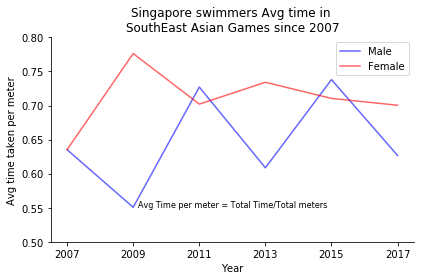

In [53]:
fig,ax=plt.subplots()

years = ['2007','2009','2011','2013' ,'2015','2017']
year_index = [i for i in range(0,len(years))]
time = [avg_time_2007_male,avg_time_2009_male,avg_time_2011_male,avg_time_2013_male,avg_time_2015_male,avg_time_2017_male]
time_female = [avg_time_2007_female,avg_time_2009_female,avg_time_2011_female,avg_time_2013_female,avg_time_2015_female,avg_time_2017_female]
ax.set_ylim(0.5,0.8)
plt.xticks(year_index,years)

plt.plot(year_index, time,'-b',alpha=0.6,label='Male')
plt.plot(year_index,time_female,'-r',alpha=0.6,label='Female')

plt.xlabel('Year')
plt.ylabel('Avg time taken per meter')
plt.title( 'Singapore swimmers Avg time in \nSouthEast Asian Games since 2007')
plt.legend()

ax.text(year_index[1],time[1],'\n  Avg Time per meter = Total Time/Total meters',fontsize=8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
fig.tight_layout()
plt.savefig('SEAGamesSGAnalysis.png')
plt.show()